In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
dataset=pd.read_csv("heart_2020_cleaned.csv")

In [3]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(dataset, title="Profiling Report")
# profile.to_file("your_report.html")

In [4]:
dataset.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No


In [5]:
dataset.shape

(319795, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
dataset.isnull().sum()

# Here is no null values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [10]:
dataset=dataset.drop_duplicates()
# we have found some duplicated data in the dataset

In [11]:
dataset.reset_index(inplace = True)

In [12]:
dataset.drop(columns="index",inplace=True)

In [13]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


<AxesSubplot: xlabel='Sex', ylabel='count'>

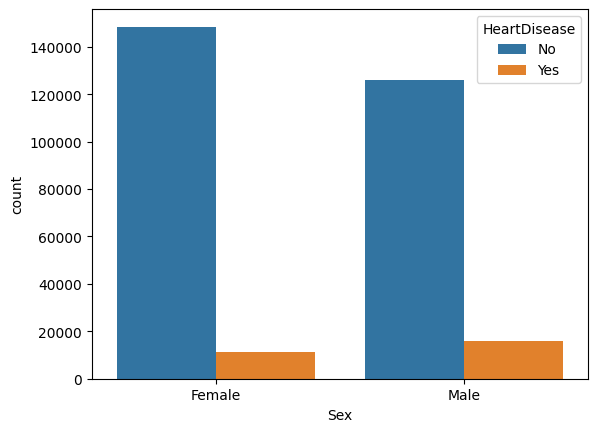

In [14]:
sn.countplot(data=dataset,x="Sex",hue="HeartDisease")

According to the above chart, men are counted longer than women in heart disease.

<AxesSubplot: xlabel='GenHealth', ylabel='count'>

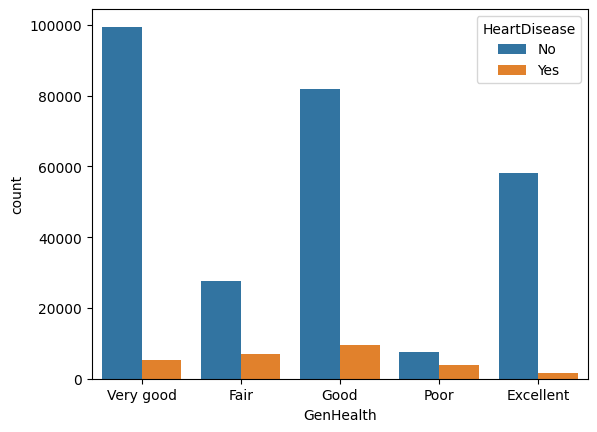

In [15]:
sn.countplot(data=dataset,x="GenHealth",hue="HeartDisease")

<AxesSubplot: xlabel='Sex', ylabel='count'>

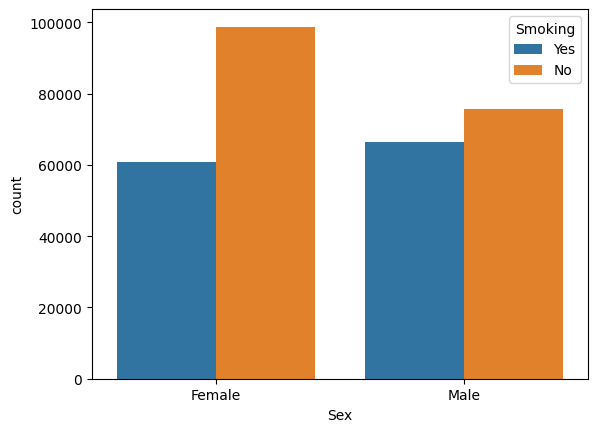

In [16]:
sn.countplot(data=dataset,x="Sex",hue="Smoking")


In [17]:
dataset.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No


we need to all column unique values

In [18]:
def check_unique_value(x):
    
    y=np.unique(x)
    return y 

In [19]:
d_col=dataset.columns

for i in range(len(d_col)):
    print(d_col[i])
    print(check_unique_value(dataset[d_col[i]]))
    print()
    print()
    

HeartDisease
['No' 'Yes']


BMI
[12.02 12.08 12.13 ... 93.97 94.66 94.85]


Smoking
['No' 'Yes']


AlcoholDrinking
['No' 'Yes']


Stroke
['No' 'Yes']


PhysicalHealth
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


MentalHealth
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


DiffWalking
['No' 'Yes']


Sex
['Female' 'Male']


AgeCategory
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']


Race
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


Diabetic
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


PhysicalActivity
['No' 'Yes']


GenHealth
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


SleepTime
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Asthma
['No' 'Yes']


KidneyDisease
['No' 'Yes']


SkinCancer
['No' 'Yes']




In [20]:
dataset["AgeCategory"]=dataset["AgeCategory"].str.replace("80 or older","80+")

In [21]:
dataset.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80+,White,No,Yes,Very good,7,No,No,No


<AxesSubplot: xlabel='HeartDisease', ylabel='MentalHealth'>

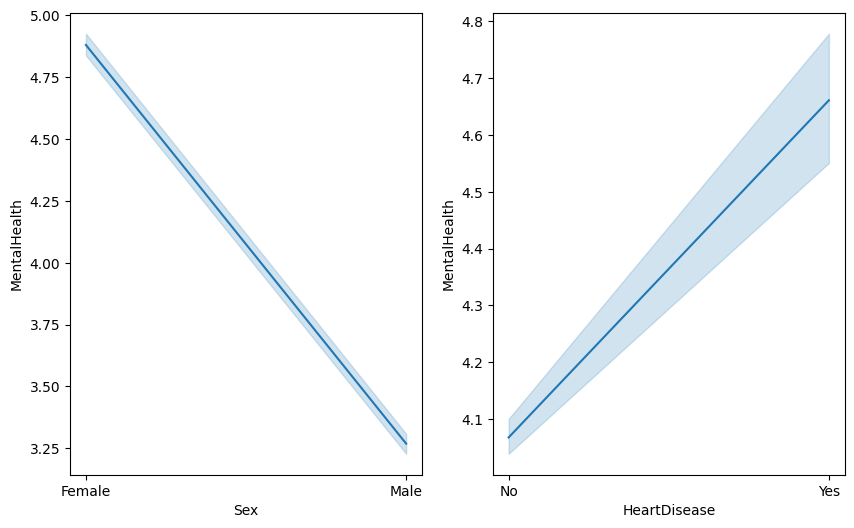

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sn.lineplot(data=dataset,x="Sex",y='MentalHealth')
# sn.lineplot(data=dataset,x="Sex",y='SleepTime')
plt.subplot(122)
sn.lineplot(data=dataset,x="HeartDisease",y='MentalHealth')


In [23]:
pd.pivot_table(data=dataset, index="Sex", aggfunc="count",values="HeartDisease")

,HeartDisease
Sex,
Female,159671
Male,142046


In [24]:
x=dataset.drop(columns="HeartDisease")
y=dataset["HeartDisease"]

# Preprocessing 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [26]:
col=x_train.select_dtypes("object").columns
col

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [27]:
# clf1 = ColumnTransformer(
#     (OrdinalEncoder(), ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
#                         'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
#                         'Asthma', 'KidneyDisease', 'SkinCancer']),
#     remainder="passthrough"
# )

In [28]:
# clf2=ColumnTransformer(transformers=[
    
#     ("trf2",StandardScaler(),['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
#        'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
#        'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
#        'SkinCancer'])
    
# ])

In [29]:
dataset.select_dtypes(["int","float"]).columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [30]:
ct=ColumnTransformer([
    
    
    ("sept1",StandardScaler(),['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']),
    ("setp2",OrdinalEncoder(),col),
    
],remainder="passthrough")

In [31]:
lr=LogisticRegression()
# dt=DecisionTreeClassifier()

In [32]:
pipe=make_pipeline(ct,lr)
# pipe2=make_pipeline(ct,dt)

In [33]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sept1', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime']),
                                                 ('setp2', OrdinalEncoder(),
                                                  Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [34]:
pipe.score(x_train,y_train),pipe.score(x_test,y_test)

(0.9103255127955489, 0.9099827654779266)

In [35]:
y_pred=pipe.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9099827654779266

In [37]:
confusion_matrix(y_test,y_pred)

array([[54437,   457],
       [ 4975,   475]], dtype=int64)

In [38]:
# TP=54437
# FP=4975
# FN=457
# TN=475

# the formul
# a is - tp/(tp+fn)

recall = recall_score(y_test, y_pred, pos_label='Yes')
print("Recall score:", recall) 

Recall score: 0.0871559633027523


In [48]:
# F1 score pending

F1 Score: 0.1488561579442181


In [39]:
# Use another model DescissioTree

In [40]:
# pipe2.fit(x_train,y_train)
# pipe2.score(x_train,y_train),pipe.score(x_test,y_test)
# y_pred1=pipe2.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# confusion_matrix(y_test,y_pred1)

In [41]:
# recall = recall_score(y_test, y_pred1, pos_label='Yes')
# print("Recall score:", recall) 

##### Based on the performance evaluation of the two models, the Logistic Regression model 
#### has provided the best predictions. Therefore, we will proceed with using the Logistic Regression model in our project.#

In [42]:
x_train["GenHealth"].unique()

array(['Very good', 'Poor', 'Excellent', 'Good', 'Fair'], dtype=object)

In [43]:
x_test.head(6)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
269634,35.59,No,No,No,0,2,Yes,Female,65-69,Black,No,Yes,Very good,8,No,No,No
197526,27.80,No,No,No,0,0,No,Male,75-79,Black,Yes,Yes,Good,8,Yes,No,No
282034,25.79,No,No,No,2,2,No,Female,50-54,White,No,Yes,Very good,8,No,No,No
116745,38.47,Yes,No,Yes,1,1,No,Female,50-54,Black,Yes,Yes,Good,10,No,No,No
101138,27.32,No,No,No,0,2,No,Female,40-44,Black,No,Yes,Very good,8,No,No,No
221858,33.28,No,No,No,0,0,No,Female,70-74,White,Yes,Yes,Good,6,No,No,No


In [44]:
y_test.head(6)

269634     No
197526     No
282034     No
116745    Yes
101138     No
221858     No
Name: HeartDisease, dtype: object

In [45]:
pickle.dump(pipe,open('pipe.pkl','wb'))